<a href="https://colab.research.google.com/github/fire-long/24-1AI-ML/blob/main/W10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6 결정트리
## 6.1 결정트리 학습과 시각화

In [2]:
import sys

#노트북이 코랩에서 실행중인지 체크
if 'google.colab' in sys.modules:
  !echo 'debconf debconf/fronted select Noninteractive'|debconf-set-selections
  #나눔 폰트 설치
  !sudo apt-get -qq -y install fonts-nanum
  import matplotlib.font_manager as fm
  font_files = fm.findSystemFonts(fontpaths=['/usr/share/fonts/truetype/nanum'])
  for fpath in font_files:
    fm.fontManager.addfont(fpath)
  #나눔바른곧기 폰트로 설정
  import matplotlib.pyplot as plt
  plt.rc('font', family='NanumBarunGothic')
  #마이너스 기호 표시 오류 수정
  import matplotlib
  matplotlib.rcParams['axes.unicode_minus'] = False
plt.rc('font',family='NanumBarunGothic')

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121918 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
iris = load_iris(as_frame = True)
X_iris = iris.data[["petal length (cm)", "petal width (cm)"]].values
y_iris = iris.target

tree_clf = DecisionTreeClassifier(max_depth = 2, random_state = 42)
tree_clf.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [4]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf,
    out_file = "iris_tree.dot",
    feature_names = ["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)
from graphviz import Source
Source.from_file("./iris_tree.dot")
#png 저장
!dot -Tpng "iris_tree.dot" -o "iris_tree.png"

In [5]:
tree_clf.tree_.threshold[[0, 2, 3]]

array([ 2.44999999,  1.75      , -2.        ])

In [6]:
tree_clf.tree_.feature[[0, 2, 3]]

array([ 0,  1, -2], dtype=int64)

## 6.2 예측

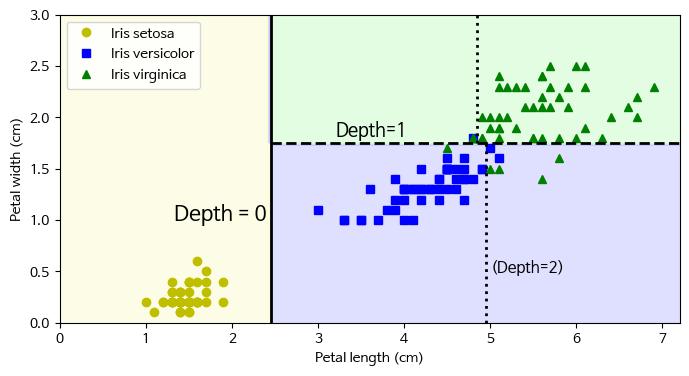

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_iris_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ['yo', 'bs', 'g^'])):
    plt.plot(X_iris[:, 0][y_iris==idx], X_iris[:, 1][y_iris==idx], style, label=f"Iris {name}")

tree_clf_deeper = DecisionTreeClassifier(max_depth = 3, random_state = 42)
tree_clf_deeper.fit(X_iris, y_iris)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0,th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth = 0", horizontalalignment = "right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment = "bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()

In [8]:
from sklearn.tree import export_graphviz
export_graphviz(
    tree_clf_deeper,
    out_file = "deeper_iris_tree.dot",
    feature_names = ["꽃잎 길이 (cm)", "꽃잎 너비 (cm)"],
    class_names = iris.target_names,
    rounded = True,
    filled = True
)
from graphviz import Source
Source.from_file("./deeper_iris_tree.dot")
#png 저장
!dot -Tpng "deeper_iris_tree.dot" -o "deeper_iris_tree.png"

In [9]:
tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]

array([2.44999999, 1.75      , 4.95000005, 4.85000014])

In [10]:
tree_clf_deeper.tree_.feature[[0, 2, 3, 6]]

array([0, 1, 0, 0], dtype=int64)

## 6.3 클래스 확률 추정

In [11]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [12]:
tree_clf.predict([[5, 1.5]])

array([1])

## 6.7 규제 매개변수

In [14]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples=150, noise=0.2, random_state=42)

tree_clf1 = DecisionTreeClassifier(random_state=42)
tree_clf2 = DecisionTreeClassifier(min_samples_leaf = 5, random_state=42)
tree_clf1.fit(X_moons, y_moons)
tree_clf2.fit(X_moons, y_moons)

DecisionTreeClassifier(min_samples_leaf=5, random_state=42)

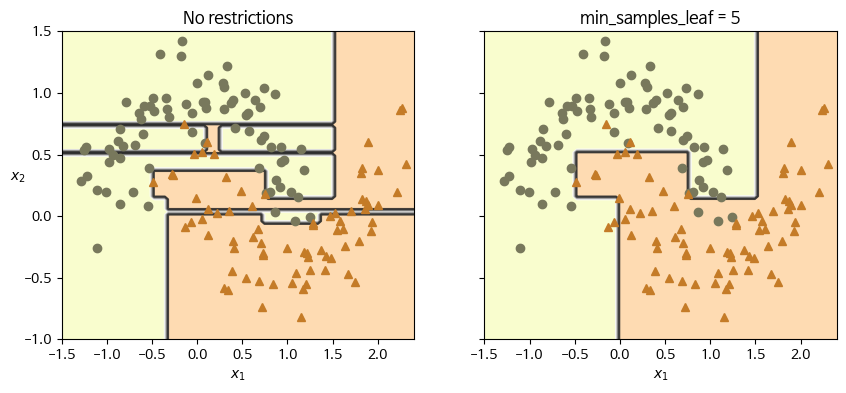

In [16]:
def plot_decision_boundary(clf, X, y, axes, cmap):
  x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
  X_new = np.c_[x1.ravel(), x2.ravel()]
  y_pred = clf.predict(X_new).reshape(x1.shape)

  plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=cmap)
  plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8)
  colors = {"Wistia":["#78785c", "#c47b27"], "Pastell":["red", "blue"]}
  markers = ("o", "^")
  for idx in (0, 1):
      plt.plot(X[:, 0][y == idx], X[:, 1][y==idx],
               color = colors[cmap][idx], marker = markers[idx], linestyle="none")
  plt.axis(axes)
  plt.xlabel(r"$x_1$")
  plt.ylabel(r"$x_2$", rotation=0)
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf1, X_moons, y_moons, axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title("No restrictions")
plt.sca(axes[1])
plot_decision_boundary(tree_clf2, X_moons, y_moons, axes=[-1.5, 2.4, -1, 1.5], cmap="Wistia")
plt.title(f"min_samples_leaf = {tree_clf2.min_samples_leaf}")
plt.ylabel("")
plt.show()

In [17]:
X_moons_test, y_moons_test = make_moons(n_samples=1000, noise=0.2, random_state=43)
tree_clf1.score(X_moons_test, y_moons_test)

0.898

In [18]:
tree_clf2.score(X_moons_test, y_moons_test)

0.92

## 6.8 회귀

In [19]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
np.random.seed(42)
X_quad = np.random.rand(200, 1) - 0.5#랜덤한 하나의 입력 특성
y_quad = X_quad ** 2 + 0.025 * np.random.randn(200, 1)
tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=2, random_state=42)

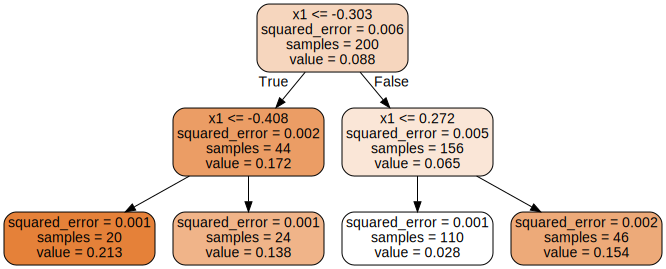

In [21]:
export_graphviz(
    tree_reg,
    out_file = "regression_tree.dot",
    feature_names = ["x1"],
    rounded = True,
    filled = True
)
Source.from_file("./regression_tree.dot")

In [22]:
tree_reg2 = DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg2.fit(X_quad, y_quad)

DecisionTreeRegressor(max_depth=3, random_state=42)

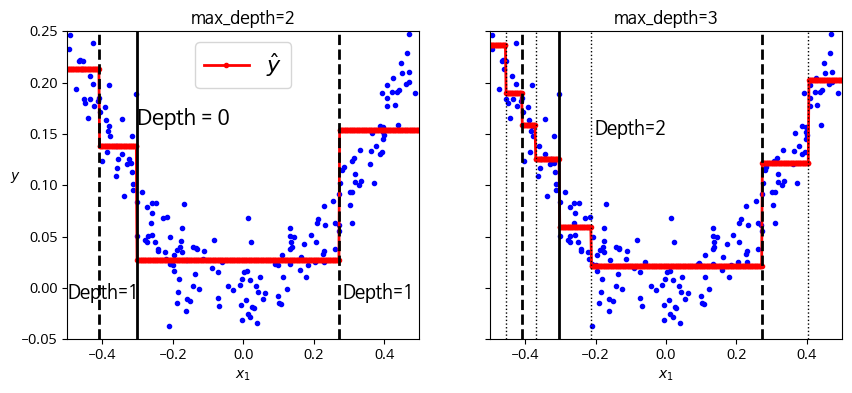

In [24]:
def plot_regression_predictions(tree_reg, X, y, axes=[-0.5, 0.5, -0.05, 0.25]):
  x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
  y_pred = tree_reg.predict(x1)
  plt.axis(axes)
  plt.xlabel(r"$x_1$")
  plt.plot(X, y, "b.")
  plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")
fig, axes = plt.subplots(ncols = 2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_regression_predictions(tree_reg, X_quad, y_quad)

th0, th1a, th1b = tree_reg.tree_.threshold[[0, 1, 4]]
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
  plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
plt.text(th0, 0.16, "Depth = 0", fontsize=15)
plt.text(th1a + 0.01, -0.01, "Depth=1", horizontalalignment="center", fontsize=13)
plt.text(th1b + 0.01, -0.01, "Depth=1", fontsize=13)
plt.ylabel("$y$", rotation=0)
plt.legend(loc="upper center", fontsize=16)
plt.title("max_depth=2")

plt.sca(axes[1])
th2s = tree_reg2.tree_.threshold[[2, 5, 9, 12]]
plot_regression_predictions(tree_reg2, X_quad, y_quad)
for split, style in ((th0, "k-"), (th1a, "k--"), (th1b, "k--")):
  plt.plot([split, split], [-0.05, 0.25], style, linewidth=2)
for split in th2s:
  plt.plot([split, split], [-0.05, 0.25], "k:", linewidth=1)
plt.text(th2s[2] + 0.01, 0.15, "Depth=2", fontsize=13)
plt.title("max_depth=3")
plt.show()

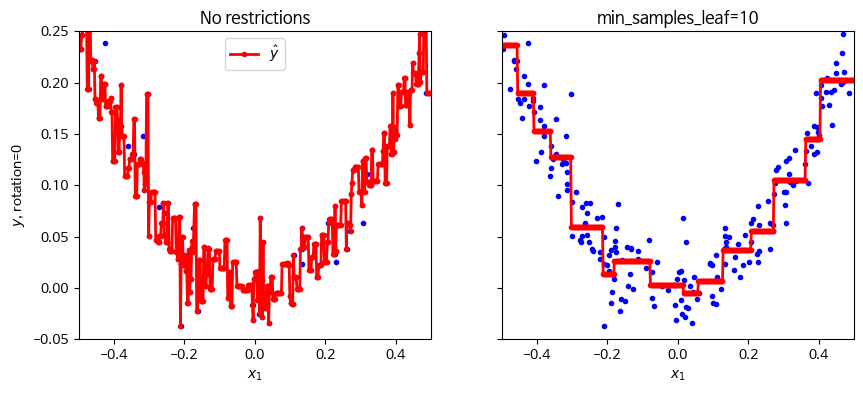

In [25]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X_quad, y_quad)
tree_reg2.fit(X_quad, y_quad)

x1 = np.linspace(-0.5, 0.5, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

fig, axes = plt.subplots(ncols = 2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel(r"$x_1$")
plt.ylabel("$y$, rotation=0")
plt.legend(loc="upper center")
plt.title("No restrictions")

plt.sca(axes[1])
plt.plot(X_quad, y_quad, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([-0.5, 0.5, -0.05, 0.25])
plt.xlabel(r"$x_1$")
plt.title(f"min_samples_leaf={tree_reg2.min_samples_leaf}")
plt.show()

## 6.9 축 방향에 대한 민감성

In [26]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

pca_pipeline = make_pipeline(StandardScaler(), PCA())
X_iris_rotated = pca_pipeline.fit_transform(X_iris)
tree_clf_pca = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf_pca.fit(X_iris_rotated, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=42)

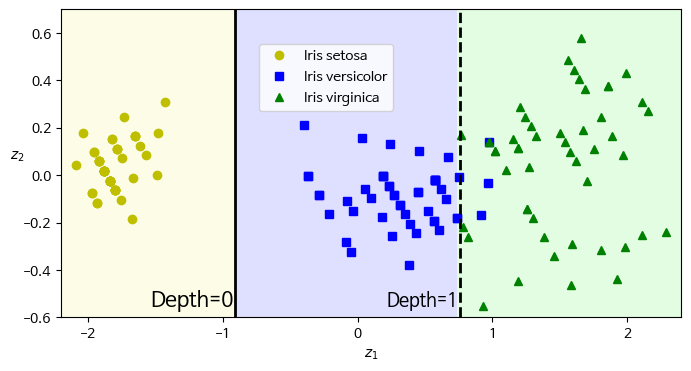

In [27]:
plt.figure(figsize=(8, 4))

axes = [-2.2, 2.4, -0.6, 0.7]
z0s, z1s = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                       np.linspace(axes[2], axes[3], 100))
X_iris_pca_all = np.c_[z0s.ravel(), z1s.ravel()]
y_pred = tree_clf_pca.predict(X_iris_pca_all).reshape(z0s.shape)

plt.contourf(z0s, z1s, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
  plt.plot(X_iris_rotated[:, 0][y_iris == idx],
           X_iris_rotated[:, 1][y_iris == idx],
           style, label=f"Iris {name}")
plt.xlabel("$z_1$")
plt.ylabel("$z_2$", rotation=0)
th1, th2 = tree_clf_pca.tree_.threshold[[0, 2]]
plt.plot([th1, th1], axes[2:], "k-", linewidth=2)
plt.plot([th2, th2], axes[2:], "k--", linewidth=2)
plt.text(th1 - 0.01, axes[2]+0.05, "Depth=0",
         horizontalalignment = "right", fontsize=15)
plt.text(th2 - 0.01, axes[2]+0.05, "Depth=1",
         horizontalalignment = "right", fontsize=13)
plt.axis(axes)
plt.legend(loc=(0.32, 0.67))
plt.show()

In [28]:
tree_clf_tweaked = DecisionTreeClassifier(max_depth=2, random_state=40)
tree_clf_tweaked.fit(X_iris, y_iris)

DecisionTreeClassifier(max_depth=2, random_state=40)

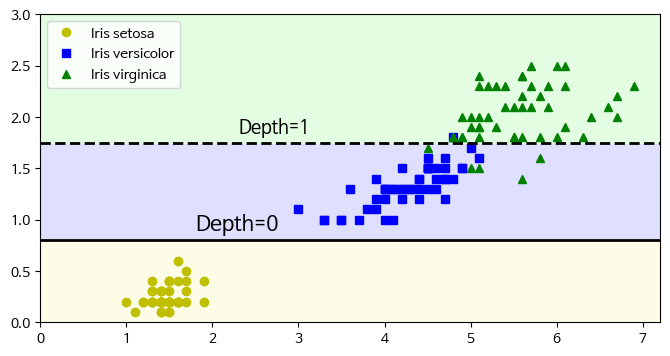

In [30]:
plt.figure(figsize=(8, 4))
y_pred = tree_clf_tweaked.predict(X_iris_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)

for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
  plt.plot(X_iris[:, 0][y_iris == idx], X_iris[:, 1][y_iris == idx], style, label=f"Iris {name}")
th0, th1 = tree_clf_tweaked.tree_.threshold[[0, 2]]
plt.plot([0, 7.2], [th0, th0], "k-", linewidth=2)
plt.plot([0, 7.2], [th1, th1], "k--", linewidth=2)
plt.text(1.8, th0+0.05, "Depth=0", verticalalignment="bottom", fontsize=15)
plt.text(2.3, th1+0.05, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.axis([0, 7.2, 0, 3])
plt.legend()
plt.show()

# 연습문제 7

In [31]:
#a. make_mmons(n_samples = 1000, noise = 0.4)를 사용해 데이터셋 생성
from sklearn.datasets import make_moons
X_moons, y_moons = make_moons(n_samples = 1000, noise=0.4, random_state=42)

In [32]:
#b.이를 train_test_split()을 사용해 훈련 세트와 테스트 세트로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)

In [33]:
#c.DecisionTreeClassifier의 최적 매개변수를 찾고자 교차 검증과 함께 그리드 탐색 수행(GridSearchCV). Hint:여러 max_leaf_nodes 값 시도
from sklearn.model_selection import GridSearchCV

params={
    'max_leaf_nodes':list(range(2, 100)),
    'max_depth':list(range(1, 10)),
    'min_samples_split':[2, 3, 4]

}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=3)

grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]})

In [34]:
#d.찾은 매개변수를 사용해 전체 훈련세트에 대해 모델을 훈련시키고 테스트 세트에서 성능 측정. 대략 85~87% 정확도가 나옴
from sklearn.metrics import accuracy_score

y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.855

In [35]:
grid_search_cv.best_params_

{'max_depth': 2, 'max_leaf_nodes': 4, 'min_samples_split': 2}

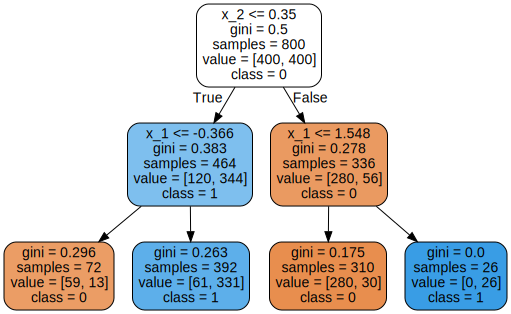

In [38]:
#시각화
from sklearn.tree import export_graphviz
export_graphviz(
    grid_search_cv.best_estimator_,
    out_file = "moon_tree.dot",
    feature_names = ["x_1", "x_2"],
    class_names=["0", "1"],
    rounded = True,
    filled = True
)
Source.from_file("./moon_tree.dot")
